**KELOMPOK 7 KOSAN ACONG**

ANGGOTA :

**- Rizky valent 10123069**

**- Abdul Rapli 10123058**

**- Satriyo Nugroho 10123075**

**- Dani Nurhalim 10123076**

**- Muhammad Rifqi 10123057**

**- Tongku Nevin 10123073**

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tkinter import Tk
from tkinter.filedialog import askopenfilename

In [8]:
# Memilih file secara manual jika tidak ditemukan
print("Membaca dataset...")

def load_csv(file_name):
    if os.path.exists(file_name):
        return pd.read_csv(file_name)
    else:
        print(f"File {file_name} tidak ditemukan. Harap unggah file ke direktori yang sesuai.")
        return None

Membaca dataset...


In [9]:
# Memuat dataset
day_df = load_csv('day.csv')
hour_df = load_csv('hour.csv')

if day_df is None or hour_df is None:
    raise FileNotFoundError("Satu atau lebih file dataset tidak ditemukan. Pastikan file telah diunggah.")

In [21]:
# Menampilkan dataset sebagai tabel
print("\nDataset Harian:")
display(day_df.head(10))
print("\nDataset Per Jam:")
display(hour_df.head(10))


Dataset Harian:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321



Dataset Per Jam:


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [10]:
#Menampilkan informasi umum tentang dataset
print("\nInformasi tentang dataset harian:")
print(day_df.info())
print("\nInformasi tentang dataset per jam:")
print(hour_df.info())


Informasi tentang dataset harian:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None

Informasi tentang dataset per jam:
<class 'pandas.co

In [11]:
# Menampilkan beberapa baris pertama
print("\nBeberapa baris pertama dari dataset harian:")
display(day_df.head())
print("\nBeberapa baris pertama dari dataset per jam:")
display(hour_df.head())


Beberapa baris pertama dari dataset harian:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600



Beberapa baris pertama dari dataset per jam:


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [12]:
# Statistik deskriptif
print("\nStatistik deskriptif dari dataset harian:")
print(day_df.describe())
print("\nStatistik deskriptif dari dataset per jam:")
print(hour_df.describe())


Statistik deskriptif dari dataset harian:
          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894

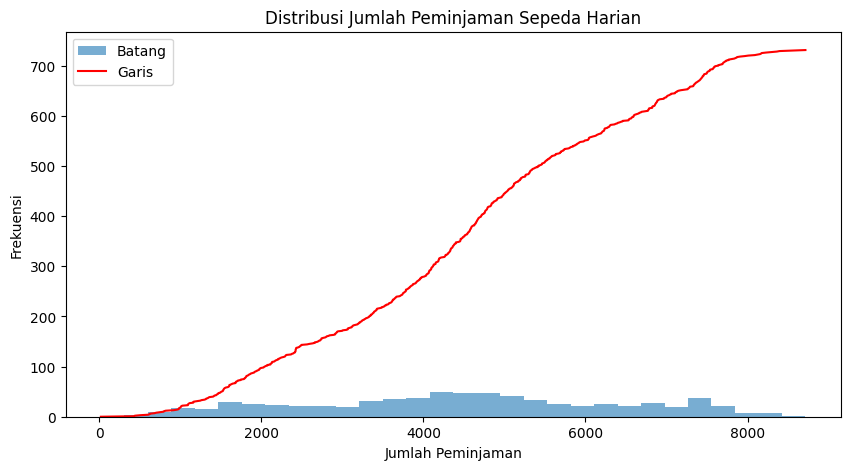

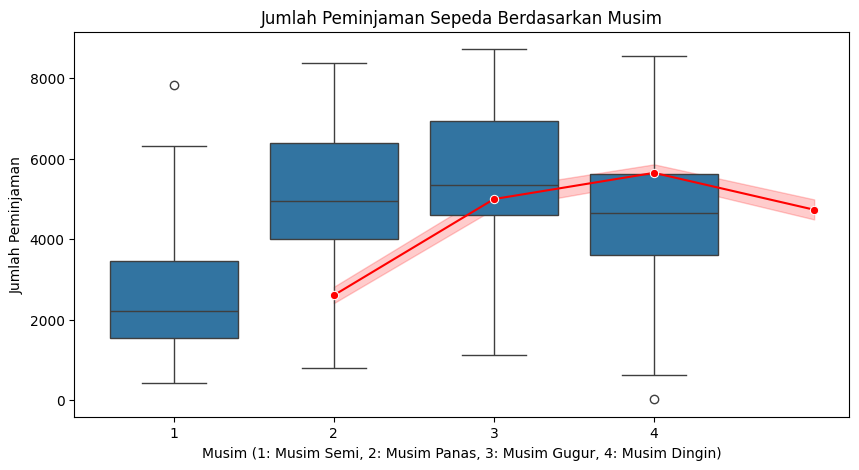

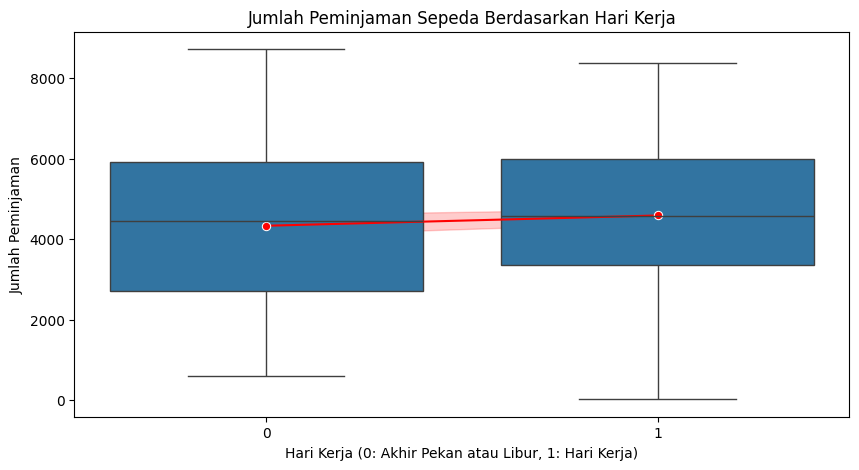

In [14]:
# Visualisasi distribusi jumlah peminjaman sepeda harian
plt.figure(figsize=(10, 5))
plt.hist(day_df['cnt'], bins=30, alpha=0.6, label='Batang')
plt.plot(sorted(day_df['cnt']), np.linspace(0, len(day_df), len(day_df)), color='red', label='Garis')
plt.title('Distribusi Jumlah Peminjaman Sepeda Harian')
plt.xlabel('Jumlah Peminjaman')
plt.ylabel('Frekuensi')
plt.legend()
plt.show()

# Visualisasi jumlah peminjaman berdasarkan musim
plt.figure(figsize=(10, 5))
sns.boxplot(x='season', y='cnt', data=day_df)
sns.lineplot(x=day_df['season'], y=day_df['cnt'], marker='o', color='red')
plt.title('Jumlah Peminjaman Sepeda Berdasarkan Musim')
plt.xlabel('Musim (1: Musim Semi, 2: Musim Panas, 3: Musim Gugur, 4: Musim Dingin)')
plt.ylabel('Jumlah Peminjaman')
plt.show()

# Visualisasi jumlah peminjaman berdasarkan hari kerja
plt.figure(figsize=(10, 5))
sns.boxplot(x='workingday', y='cnt', data=day_df)
sns.lineplot(x=day_df['workingday'], y=day_df['cnt'], marker='o', color='red')
plt.title('Jumlah Peminjaman Sepeda Berdasarkan Hari Kerja')
plt.xlabel('Hari Kerja (0: Akhir Pekan atau Libur, 1: Hari Kerja)')
plt.ylabel('Jumlah Peminjaman')
plt.show()

In [15]:
# Membangun model prediksi menggunakan regresi linear
print("\nMembangun model prediksi...")
fitur = ['temp', 'atemp', 'hum', 'windspeed', 'season', 'holiday', 'weekday', 'workingday', 'weathersit']
X = day_df[fitur]
y = day_df['cnt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Membangun model prediksi...


In [19]:
# Melatih model
model = LinearRegression()
model.fit(X_train, y_train)

# Melakukan prediksi
y_pred = model.predict(X_test)


Membangun model prediksi...


In [18]:
# Evaluasi model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nEvaluasi Model:")
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-Squared Score: {r2}')


Evaluasi Model:
Mean Absolute Error (MAE): 1146.464209356144
Mean Squared Error (MSE): 1806369.613573471
R-Squared Score: 0.5495205386162113


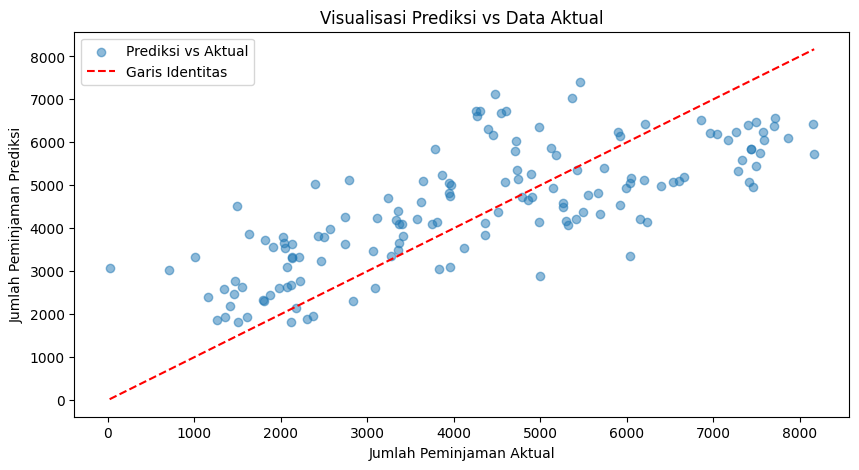

In [20]:
# Visualisasi hasil prediksi vs data aktual
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.5, label='Prediksi vs Aktual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Garis Identitas')
plt.xlabel('Jumlah Peminjaman Aktual')
plt.ylabel('Jumlah Peminjaman Prediksi')
plt.title('Visualisasi Prediksi vs Data Aktual')
plt.legend()
plt.show()